In [1]:
!pip install textblob

In [2]:
!pip install tweepy

In [3]:
!pip install wordcloud

In [4]:
!pip install regex

In [5]:
!pip install textblob-fr

In [6]:
# Importer les librairies 
import tweepy 
from textblob import TextBlob
from textblob_fr import PatternTagger, PatternAnalyzer
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [7]:
# Charger les données d'authentification Client de l'API Twitter depuis un fichier excel 
log = pd.read_excel("C:/Users/Romual/Desktop/Login.xlsx")

In [8]:
log.columns

Index(['key1', 'key2', 'key3', 'key4'], dtype='object')

In [9]:
# Twitter API Credentials
consumerKey = log.iloc[0,0]
consumerSecret = log.iloc[0,1]
accessToken = log.iloc[0,2]
accessTokenSecret = log.iloc[0,3]

In [10]:
# Créer l'objet d'authentification
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)

# Parametrer le access token et le access token secret
auth.set_access_token(accessToken, accessTokenSecret)

# Créer l'objet API en transmettant les informations d'authentification
api = tweepy.API(auth, wait_on_rate_limit= True)

In [11]:
# Extraire 100 tweets de l'utilisateur Twitter
posts = api.user_timeline(screen_name= "AOuattara_PRCI", count= 100, tweet_mode="extended")

# Afficher les 5 derniers tweets du compte du PR Alassane Ouattara 
print("Afficher les 5 tweets récents: \n")
i=1
for tweet in posts[0:5]:
    print(str(i) + ") "+ tweet.full_text + "\n")
    i= i+1

Afficher les 5 tweets récents: 

1) Prière de la fin du #Ramadan (Aïd el-Fitr) à la Grande Mosquée de la Riviera Golf. https://t.co/GiIACOnC4z

2) Ce lundi, j’ai pris part à la prière de l’Aïd el-Fitr. 

Je souhaite une excellente fête de Ramadan à tous nos frères et sœurs musulmans, dans la paix, la solidarité et le bonheur.

Que Dieu bénisse notre beau Pays ! https://t.co/HmJUnOUT4r

3) A l’occasion de la célébration de l’Aïd El Fitr, marquant la fin du jeûne du mois de Ramadan, je souhaite une très bonne fête à toute la communauté musulmane. https://t.co/gun54ohLgx

4) Je félicite les travailleuses et les travailleurs du monde paysan, de la fonction publique et du secteur privé dont les efforts et l’abnégation au travail ont permis à notre pays de réaliser des performances économiques et sociales remarquables au cours des 10 dernières années ! https://t.co/xUYqOaRr7q

5) Heureux de regagner Abidjan, ce vendredi, après un séjour en #ArabieSaoudite. https://t.co/Kd30ZisS8Q



In [12]:
# Créer un dataframe avec une colonne appelée Tweets dans lequel nous allons ajouter nos tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

# Afficher les 5 premières lignes de données
df.head()

,Tweets
0,Prière de la fin du #Ramadan (Aïd el-Fitr) à l...
1,"Ce lundi, j’ai pris part à la prière de l’Aïd ..."
2,A l’occasion de la célébration de l’Aïd El Fit...
3,Je félicite les travailleuses et les travaille...
4,"Heureux de regagner Abidjan, ce vendredi, aprè..."


In [13]:
# Nettoyer le texte pour le préparer à l'analyse de sentiment

# Créer une fonction pour nettoyer les tweets
def NettoyerTxt(texte):
    texte = re.sub(r'@[A-Za-z0-9]+', '', texte) # Supprimer les @mentions
    texte = re.sub(r'#', '', texte) # Supprimer les symboles '#'
    texte = re.sub(r'RT[\s]+', '', texte) # Supprimer RT
    texte = re.sub(r'https?:\/\/\S+', '', texte) # Supprimer les liens hyper textes
    
    return texte

# Nettoyage du texte
df['Tweets'] = df['Tweets'].apply(NettoyerTxt)

# Afficher le texte nettoyé
df

,Tweets
0,Prière de la fin du Ramadan (Aïd el-Fitr) à la...
1,"Ce lundi, j’ai pris part à la prière de l’Aïd ..."
2,A l’occasion de la célébration de l’Aïd El Fit...
3,Je félicite les travailleuses et les travaille...
4,"Heureux de regagner Abidjan, ce vendredi, aprè..."
...,...
95,Thank you for our constructive discussion on ...
96,"Entretien avec Jutta URPILAINEN, Commissaire e..."
97,Nos échanges ont porté sur le renforcement de ...
98,J'ai eu un entretien avec la Commissaire europ...


In [14]:
# Enregistrer notre jeu de données 
df.to_csv('Tweets_Ado.csv')

In [15]:
# Créer une fonction pour obtenir la subjectivité
def getSubjectivity(texte):
    return TextBlob(texte,pos_tagger=PatternTagger(),analyzer=PatternAnalyzer()).sentiment[1]

# Créer une fonction pour obtenir la polarité
def getPolarity(texte):
    return TextBlob(texte,pos_tagger=PatternTagger(),analyzer=PatternAnalyzer()).sentiment[0]

# Créer deux nouvelles colonnes
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Afficher le nouveau dataframe avec les nouvelles colonnes ajoutées 
df

,Tweets,Subjectivity,Polarity
0,Prière de la fin du Ramadan (Aïd el-Fitr) à la...,0.175000,0.100000
1,"Ce lundi, j’ai pris part à la prière de l’Aïd ...",0.450000,0.555000
2,A l’occasion de la célébration de l’Aïd El Fit...,0.416667,0.373333
3,Je félicite les travailleuses et les travaille...,0.200000,0.059643
4,"Heureux de regagner Abidjan, ce vendredi, aprè...",0.800000,0.700000
...,...,...,...
95,Thank you for our constructive discussion on ...,0.000000,0.000000
96,"Entretien avec Jutta URPILAINEN, Commissaire e...",0.000000,0.175000
97,Nos échanges ont porté sur le renforcement de ...,0.000000,0.000000
98,J'ai eu un entretien avec la Commissaire europ...,0.000000,0.175000


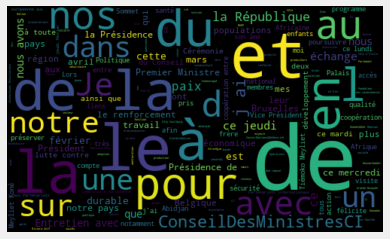

In [16]:
# Tracer le nuage de mots 'word cloud'
allWords = ' '.join( [twts for twts in df['Tweets']] )
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [17]:
# Créer une fonction pour calculer l'analyse négative, neutre et positive
def getAnalysis(score):
    if score < 0:
        return 'Negatif'
    elif score == 0:
        return 'Neutre'
    else:
        return 'Positif'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

# Afficher le dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,Prière de la fin du Ramadan (Aïd el-Fitr) à la...,0.175000,0.100000,Positif
1,"Ce lundi, j’ai pris part à la prière de l’Aïd ...",0.450000,0.555000,Positif
2,A l’occasion de la célébration de l’Aïd El Fit...,0.416667,0.373333,Positif
3,Je félicite les travailleuses et les travaille...,0.200000,0.059643,Positif
4,"Heureux de regagner Abidjan, ce vendredi, aprè...",0.800000,0.700000,Positif
...,...,...,...,...
95,Thank you for our constructive discussion on ...,0.000000,0.000000,Neutre
96,"Entretien avec Jutta URPILAINEN, Commissaire e...",0.000000,0.175000,Positif
97,Nos échanges ont porté sur le renforcement de ...,0.000000,0.000000,Neutre
98,J'ai eu un entretien avec la Commissaire europ...,0.000000,0.175000,Positif


In [18]:
# Afficher tous les tweets positifs du PR
l = 1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Positif'):
        print(str(l) + ') ' + sortedDF['Tweets'][i])
        print()
        l = l+1

1) Prière de la fin du Ramadan (Aïd el-Fitr) à la Grande Mosquée de la Riviera Golf. 

2) Ce lundi, j’ai pris part à la prière de l’Aïd el-Fitr. 

Je souhaite une excellente fête de Ramadan à tous nos frères et sœurs musulmans, dans la paix, la solidarité et le bonheur.

Que Dieu bénisse notre beau Pays ! 

3) A l’occasion de la célébration de l’Aïd El Fitr, marquant la fin du jeûne du mois de Ramadan, je souhaite une très bonne fête à toute la communauté musulmane. 

4) Je félicite les travailleuses et les travailleurs du monde paysan, de la fonction publique et du secteur privé dont les efforts et l’abnégation au travail ont permis à notre pays de réaliser des performances économiques et sociales remarquables au cours des 10 dernières années ! 

5) Heureux de regagner Abidjan, ce vendredi, après un séjour en ArabieSaoudite. 

6) : Le taux de couverture électrique en Côte d’Ivoire est passé de 33% en 2011, à plus de 80% en 2020, grâce aux différents p…

7) : Grâce au programme « École

In [19]:
# Afficher tous les tweets neutres du PR
l = 1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Neutre'):
        print(str(l) + ') ' + sortedDF['Tweets'][i])
        print()
        l = l+1

1) Départ pour l’Arabie Saoudite. 

2) Ma déclaration à l’entame du ConseilDesMinistresCI de ce jeudi 21 avril 2022

 

3) : Communiqué de la Présidence de la République relatif à la signature du décret portant nomination des membres du Gouvernem…

4) : Communiqué de la Présidence de la République 

5) 

6) 

7) Message sur l’état de la Nation devant le Parlement réuni en congrès, ce mardi 19 avril 2022, à la Fondation Félix Houphouët-Boigny pour la recherche de la paix, à Yamoussoukro. EtatdelaNation 

8) 𝐄𝐧𝐭𝐫𝐞𝐭𝐢𝐞𝐧 𝐚𝐯𝐞𝐜 , 𝐏𝐫é𝐬𝐢𝐝𝐞𝐧𝐭 𝐝𝐞 𝐥𝐚 𝐑é𝐩𝐮𝐛𝐥𝐢𝐪𝐮𝐞 𝐭𝐨𝐠𝐨𝐥𝐚𝐢𝐬𝐞, 𝐞𝐧 𝐯𝐢𝐬𝐢𝐭𝐞 𝐝𝐞 𝐭𝐫𝐚𝐯𝐚𝐢𝐥 𝐞𝐭 𝐝’𝐚𝐦𝐢𝐭𝐢é 𝐞𝐧 𝐂ô𝐭𝐞 𝐝’𝐈𝐯𝐨𝐢𝐫𝐞, 𝐜𝐞 𝐣𝐞𝐮𝐝𝐢 𝟏𝟒 𝐚𝐯𝐫𝐢𝐥 𝟐𝟎𝟐𝟐 

9) Entretien avec Patrice Motsepe, Président de la Confédération Africaine de Football CAF, ce lundi 04 avril 2022 

10) Garantir l’accès des populations en eau potable, une priorité pour notre pays ! 

11) La lutte contre la cherté de la vie est au cœur de notre action. ConseilDesMinistresCI 

12) …..le Sommet UEUA où j’ai insisté sur la nécessité de pre

In [20]:
# Afficher tous les tweets negatifs du PR
l = 1
sortedDF = df.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Negatif'):
        print(str(l) + ') ' + sortedDF['Tweets'][i])
        print()
        l = l+1

1) : Entre 2015 et 2020, l’accès à l’eau potable est passé de 65% à 82% sur l’étendue du territoire national. Le PSGouv permet…

2) Cérémonie Solennelle de Prestation de Serment du Vice-Président de la République, ce mercredi 20 avril 2022 PrestationdeSermentVP 

3) Suivez, en direct du Palais de la Présidence de la République, la Cérémonie Solennelle de Prestation de Serment du Vice-président, ce mercredi 20 avril 2022



4) Je me félicite de l’adoption, le 30 mars dernier, en ConseilDesMinistresCI, de la Politique et de la Stratégie nationale pour une cacaoculture durable basée sur l’amélioration des revenus de nos producteurs, la lutte contre la déforestation et le travail des enfants.

5) Le mois de mars a été marqué par le renforcement de nos relations diplomatiques, la diversification de notre économie ainsi que la prise de mesures pour préserver le pouvoir d’achat de nos concitoyens. 

6) Ce vendredi, j'ai présenté mes condoléances au Ministre Ally Coulibaly et à sa famille suit

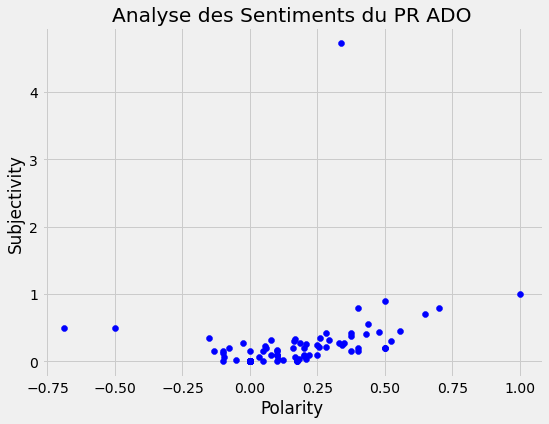

In [21]:
# Tracer la polarité et la subjectivité
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Blue')
    
plt.title('Analyse des Sentiments du PR ADO')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [22]:
# Obtenir le pourcentage de tweets positifs
tweets_positifs = df[df.Analysis == 'Positif']
tweets_positifs = tweets_positifs['Tweets']

round( (tweets_positifs.shape[0] / df.shape[0]) * 100, 1)

59.0

In [23]:
# Obtenir le pourcentage de tweets neutres 
tweets_neutres = df[df.Analysis == 'Neutre']
tweets_neutres = tweets_neutres['Tweets']

round( (tweets_neutres.shape[0] / df.shape[0]) * 100, 1)

30.0

In [24]:
# Obtenir le pourcentage de tweets négatifs
tweets_negatifs = df[df.Analysis == 'Negatif']
tweets_negatifs = tweets_negatifs['Tweets']

round( (tweets_negatifs.shape[0] / df.shape[0]) * 100, 1)

11.0

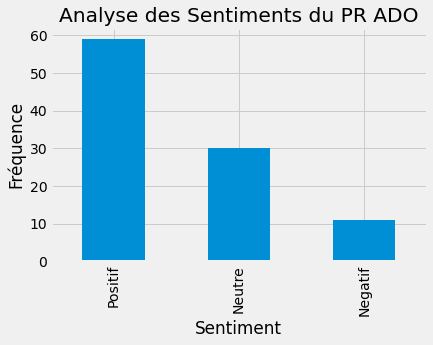

In [25]:
# Afficher les fréquences 

df['Analysis'].value_counts()

# Tracer et visualiser les fréquences de tweets par sentiment
plt.title('Analyse des Sentiments du PR ADO')
plt.xlabel('Sentiment')
plt.ylabel('Fréquence')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()